$$\textbf{Blatt 09 - Praktische Optimierung - Adrian Lentz, Robert Schönewald}$$

Lösungen und Erklärungen für Blatt 09. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import Optimizer
from skopt.plots import plot_gaussian_process
from sklearn.base import clone
from scipy.stats import norm

In [2]:
def fun1(x):
    return np.sin(5*x[0])*(1-np.tanh(x[0]**2))

def fun2(x):
    return x[0]**2-10*np.cos(5*x[0])

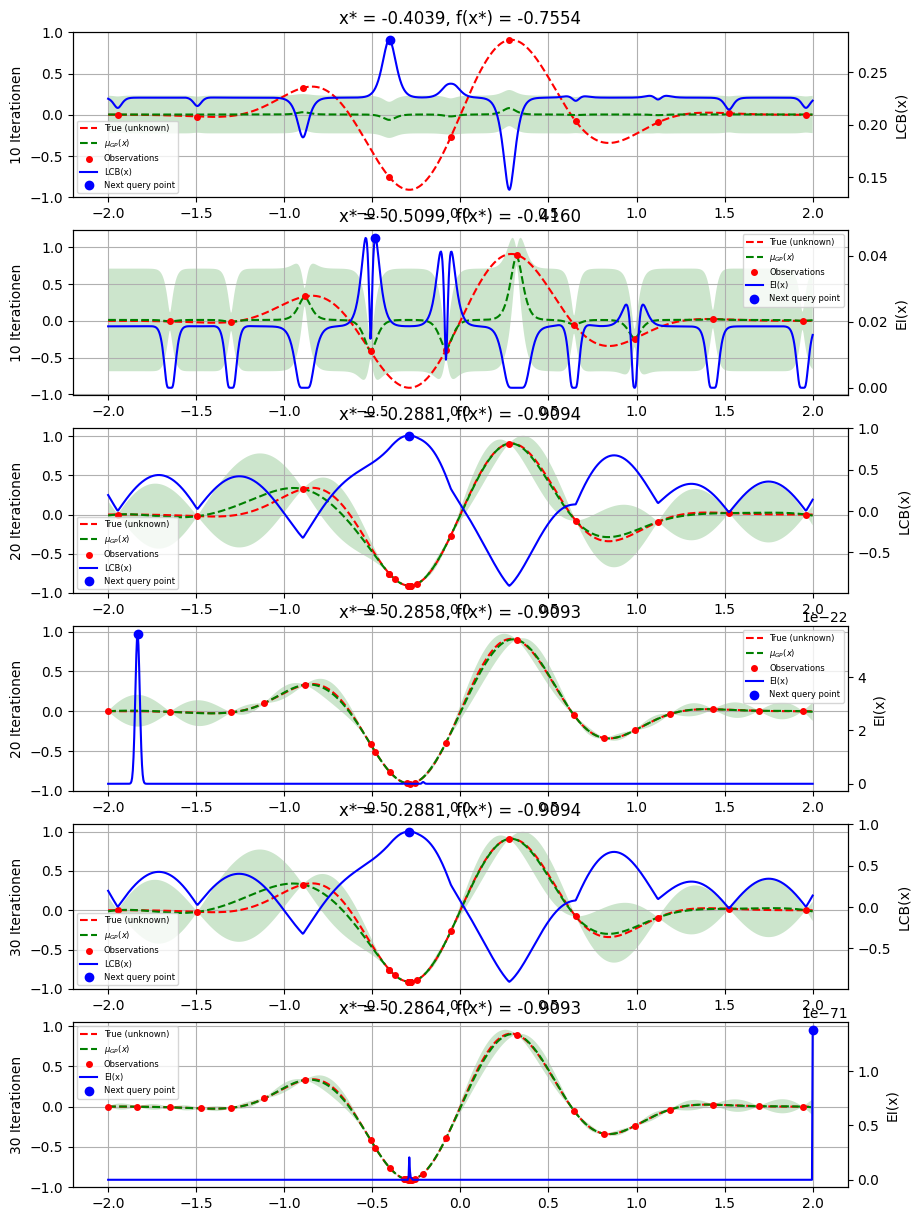

In [9]:
optfun1_LCB=Optimizer([(-2.0, 2.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="LCB")
optfun1_EI=Optimizer([(-2.0, 2.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="EI")
for n_iter in range(3):
    for i in range(10):
        x=optfun1_LCB.ask()
        y=fun1(x)
        optfun1_LCB.tell(x,y)
        x=optfun1_EI.ask()
        y=fun1(x)
        optfun1_EI.tell(x,y)
    
     # Plot true function.
    plt.subplot(6, 1, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(optfun1_LCB.get_result(),objective=fun1,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(6, 1, 2*n_iter+2)
    ax = plot_gaussian_process(optfun1_EI.get_result(),objective=fun1,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")


    
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()

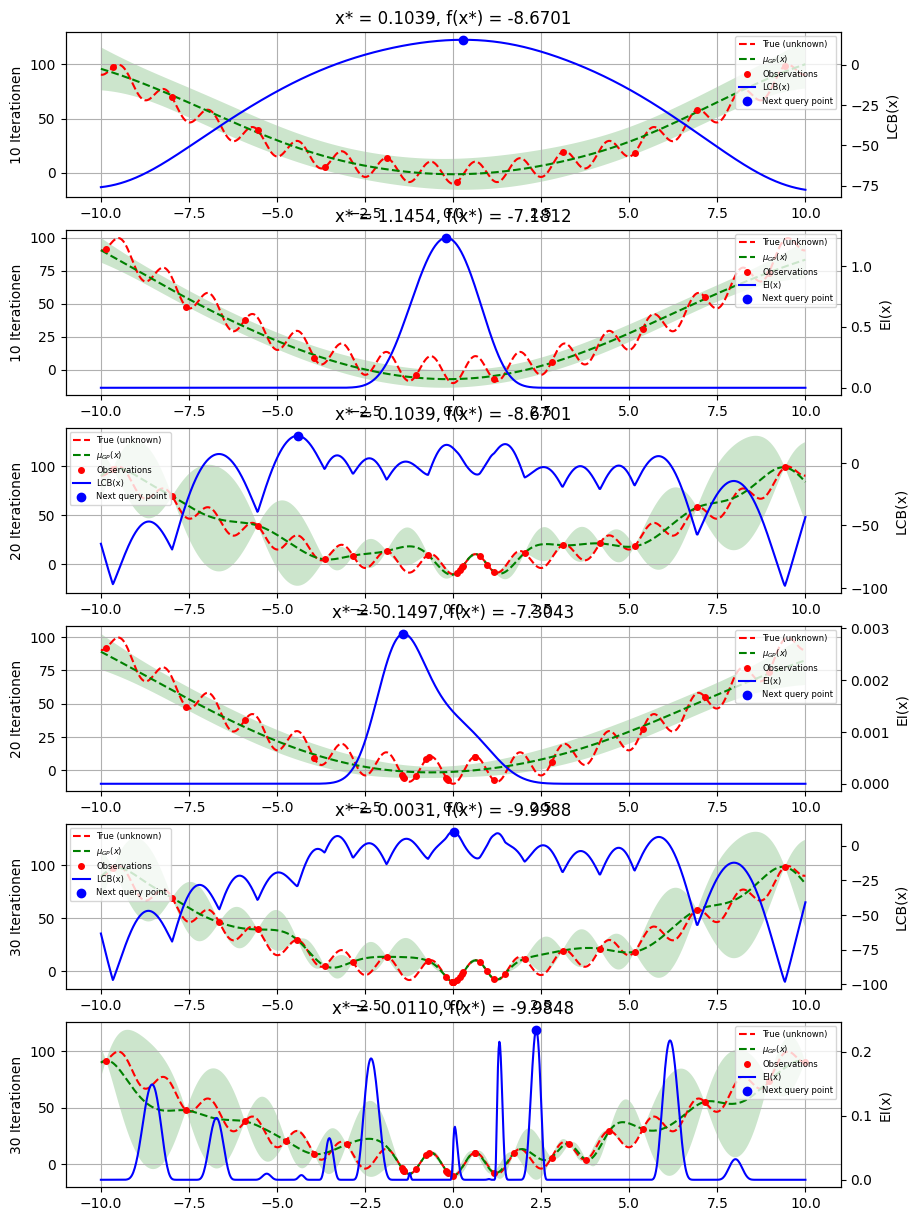

In [14]:
optfun2_LCB=Optimizer([(-10.0, 10.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="LCB")
optfun2_EI=Optimizer([(-10.0, 10.0)],base_estimator="GP",initial_point_generator="lhs",acq_func="EI")
for n_iter in range(3):
    for i in range(10):
        x=optfun2_LCB.ask()
        y=fun2(x)
        optfun2_LCB.tell(x,y)
        x=optfun2_EI.ask()
        y=fun2(x)
        optfun2_EI.tell(x,y)
    # Plot true function.
    plt.subplot(6, 1, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(optfun2_LCB.get_result(),objective=fun2,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(6, 1, 2*n_iter+2)
    ax = plot_gaussian_process(optfun2_EI.get_result(),objective=fun2,show_next_point=True,show_acq_func=True)
    ax.set_ylabel(str(n_iter*10 + 10)+" Iterationen")
    ax.set_xlabel("")
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()

In der Grafik sieht man zunächst eine rote gestrichelte Linie, welche die wahre gegebene Funktion darstellt. Auf ihr befinden sich rote Punkte, das sind die zufällig gewählten Abtastungen auf der Funktion.\
Die grüne gestrichelte Linie stellt die Approximation der echten Funktion durch das Gaussian Process Model dar. Die grünen Flächen um die Linie herum geben an, wie sicher sich der Approximator ist. Wenn die Fläche groß ist, kann die echte Funktion in diesem Bereich sein, weshalb der Approximator sich unsicher ist.\
Der blaue Graph ist die Acquisition Function.

Wir erkennen im direkten Vergleich, dass bei Funktion 1 EI deutlich näher an die echte Funktion rankommt als LCB. Auch bei der zweiten Funktion scheint EI besser zu performen. Diese Ergebnisse können jedoch schwanken, da hier nur einmal getestet wurde.

In [11]:

# Berechnung der Lower Confidence Bound (LCB)
def calculate_lcb(model, X, kappa=1.96):
    mu, sigma = model.predict(X, return_std=True)
    lcb = mu - kappa * sigma
    return lcb

# Berechnung der Expected Improvement (EI)
def calculate_ei(model, X, y_opt):
    mu, sigma = model.predict(X, return_std=True)
    Z = (y_opt - mu) / sigma
    ei = (y_opt - mu) * norm.cdf(Z) + sigma * norm.pdf(Z)
    return ei


c:\Users\Adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c

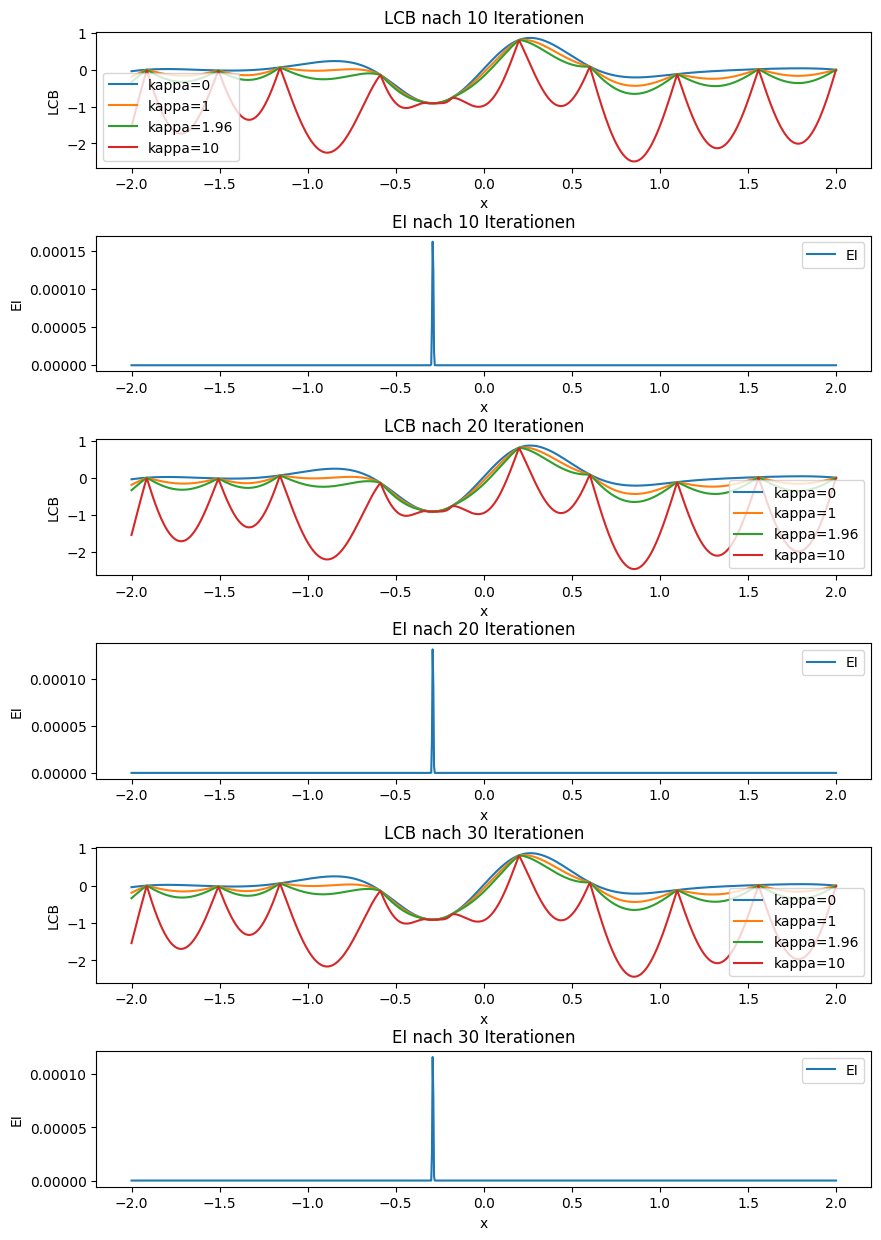

In [12]:
'Plot von LCB und EI für Funktion 1'
for n_iter in range(3):
    for i in range(10):
        # LCB
        x = optfun1_LCB.ask()
        y = fun1(x)
        optfun1_LCB.tell(x, y)

        # EI
        x = optfun1_EI.ask()
        y = fun1(x)
        optfun1_EI.tell(x, y)

    # Aktuelles Modell und Datenpunkte erhalten
    model_LCB = clone(optfun1_LCB.base_estimator_)
    model_LCB.fit(optfun1_LCB.get_result().x_iters, optfun1_LCB.get_result().func_vals)

    model_EI = clone(optfun1_EI.base_estimator_)
    model_EI.fit(optfun1_EI.get_result().x_iters, optfun1_EI.get_result().func_vals)

    # Plotten der LCB-Funktion für verschiedene kappa-Werte
    plt.subplot(6, 1, 2*n_iter+1)
    X = np.linspace(-2.0, 2.0, 1000).reshape(-1, 1)
    for kappa in [0, 1, 1.96, 10]:
        lcb = calculate_lcb(model_LCB, X, kappa)
        plt.plot(X, lcb, label=f'kappa={kappa}')
    
    plt.title(f'LCB nach {n_iter*10 + 10} Iterationen')
    plt.xlabel('x')
    plt.ylabel('LCB')
    plt.legend()

    # Plotten der EI-Funktion
    plt.subplot(6, 1, 2*n_iter+2)
    y_opt = min(optfun1_EI.get_result().func_vals)
    ei = calculate_ei(model_EI, X, y_opt)
    plt.plot(X, ei, label='EI')
    
    plt.title(f'EI nach {n_iter*10 + 10} Iterationen')
    plt.xlabel('x')
    plt.ylabel('EI')
    plt.legend()

plt.subplots_adjust(hspace=0.5)
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()

c:\Users\Adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c

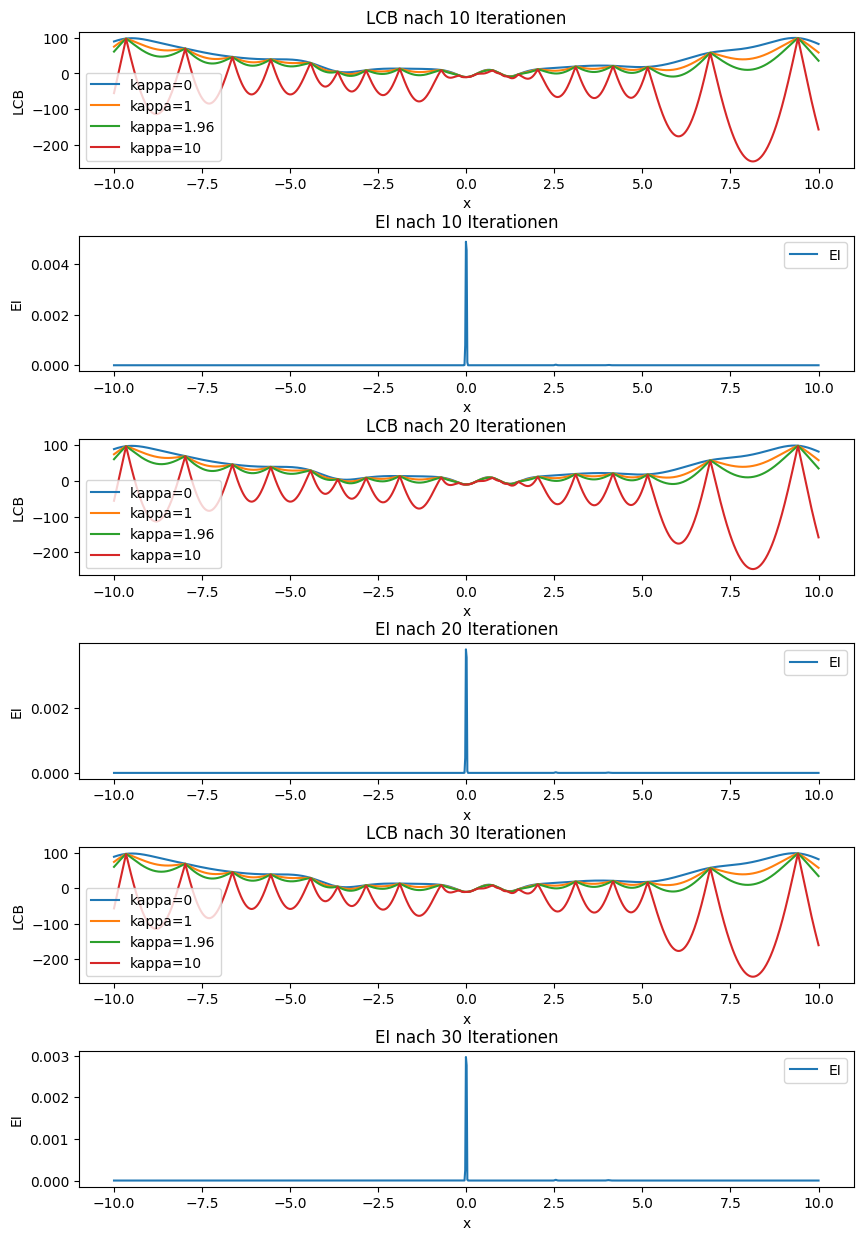

In [16]:
'Plot von LCB und EI für Funktion 2'
for n_iter in range(3):
    for i in range(10):
        # LCB
        x = optfun2_LCB.ask()
        y = fun2(x)
        optfun2_LCB.tell(x, y)

        # EI
        x = optfun2_EI.ask()
        y = fun2(x)
        optfun2_EI.tell(x, y)

    # Aktuelles Modell und Datenpunkte erhalten
    model_LCB = clone(optfun2_LCB.base_estimator_)
    model_LCB.fit(optfun2_LCB.get_result().x_iters, optfun2_LCB.get_result().func_vals)

    model_EI = clone(optfun2_EI.base_estimator_)
    model_EI.fit(optfun2_EI.get_result().x_iters, optfun2_EI.get_result().func_vals)

    # Plotten der LCB-Funktion für verschiedene kappa-Werte
    plt.subplot(6, 1, 2*n_iter+1)
    X = np.linspace(-10, 10, 1000).reshape(-1, 1)
    for kappa in [0, 1, 1.96, 10]:
        lcb = calculate_lcb(model_LCB, X, kappa)
        plt.plot(X, lcb, label=f'kappa={kappa}')
    
    plt.title(f'LCB nach {n_iter*10 + 10} Iterationen')
    plt.xlabel('x')
    plt.ylabel('LCB')
    plt.legend()

    # Plotten der EI-Funktion
    plt.subplot(6, 1, 2*n_iter+2)
    y_opt = min(optfun2_EI.get_result().func_vals)
    ei = calculate_ei(model_EI, X, y_opt)
    plt.plot(X, ei, label='EI')
    
    plt.title(f'EI nach {n_iter*10 + 10} Iterationen')
    plt.xlabel('x')
    plt.ylabel('EI')
    plt.legend()

plt.subplots_adjust(hspace=0.5)
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.show()

$$\textbf{Beschreibung der Graphen}$$

Allgemein beschreibt der LCB ein Maß zwischen der Exploration und Optimierung, d.h. bei ein hoher LCB-Wert bedeutet, dass entweder der Mittelwert hoch ist oder die Unsicherheit gering ist. Somit ist ein hoher LCB-Wert repräsentativ, dass der Punkt x nicht optimal ist.

Ein niedriger LCB-Wert bedeutet, dass entweder der Mittelwert niedrig ist oder die Unsicherheit hoch ist, somit ist der Punkt x optimaler. 

Hierbei wird klar, dass die Wahl von (kappa) entscheident ist, da ein großer Wert von (kappa) für eine starke Gewichtung der Unsicherheit sorgt. 

Aus den Abbildungen zeigt sich für kappa=0, zwar eine niedrige Schwankung der LCB-Werte, jedoch bedeutet kappa=0, dass es nur zur reinen Exploration kommt, sodass lokale Optima ein Problem darstellen.

Für einen niedrigen Kappa-Wert, wie kappa=1, wird sowohl die Exploration, als auch die Unsicherheit betrachtet, in den Abbildungen ist zu erkennen, dass auch hier der LCB wenig schwankt.

Für ein sehr großes Kappa, wie kappa=10, sieht man, dass die LCB-Werte stark schwanken, sodass es zu einer starken Exploration kommt, zu Beginn der Optimierung, kann dies sehr hilfreich sein.

--> Insgesamt ist somit die Wahl von Kappa für unterschiedliche "Phasen" der Optimierung sinnvoll: Zu Beginn bewirkt ein großer Kappa-Wert (kappa=10) eine starke Exploration, sodass der gesamte Suchraum untersucht wird. Zu einer spätern Phase der Optimierung ist ein kleinere Kappa-Wert (kappa=1.96) praktisch, da sowohl noch neue Bereiche (Exploration) und bekannte Bereiche betrachtet werden. Zum Ende der Optimierung ist ein Kappa-Wert von 1;0 praktisch, um nur noch die Optimierung zu verstärken.


Der EI wird genutzt, um ein Maß der Wahrscheinlichkeit einer Verbesserung an. 

Ein 